<a href="https://colab.research.google.com/github/MartinSantaGitHub/curso-series-temporales/blob/master/12.%20Prediciendo%20el%20futuro/Python/20_Invirtiendo_la_diferenciaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df_comp = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df_comp.shape)  # (123, 8)
df_comp.tail()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1988-07-01,4042.7,3971.9,179.6,131.5,124.9,106.2,123.5,92.8
1988-10-01,4069.4,3995.8,181.3,133.3,126.2,107.3,124.9,92.9
1989-01-01,4106.8,4019.9,184.1,134.8,127.7,109.5,126.6,94.0
1989-04-01,4132.5,4044.1,186.1,134.8,129.3,111.1,129.0,100.6
1989-07-01,4162.9,4068.4,187.4,137.2,130.2,109.8,129.9,98.2


In [2]:
dat=df_comp['gdfim']
dat.head()

date
1959-01-01    26.9
1959-04-01    27.0
1959-07-01    27.1
1959-10-01    27.1
1960-01-01    27.2
Name: gdfim, dtype: float64

In [3]:
import statsmodels.tsa.stattools as sts
result = sts.adfuller(dat)
print('p-value: %f' % result[1])

p-value: 0.938674


In [4]:
dat_ret = dat.pct_change(1).mul(100)

In [20]:
dat_ret = dat_ret.dropna()
result = sts.adfuller(dat_ret.dropna())
print('p-value: %f' % result[1])

p-value: 0.001456


In [6]:
result

(-3.9914091760985664,
 0.0014561694362850198,
 0,
 121,
 {'1%': -3.485585145896754,
  '10%': -2.5796759080663887,
  '5%': -2.885738566292665},
 363.6967673433127)

In [7]:
dat_transformed=dat.diff().dropna()
dat_transformed.tail()

date
1988-07-01    0.1
1988-10-01    1.1
1989-01-01    2.2
1989-04-01    1.6
1989-07-01   -1.3
Name: gdfim, dtype: float64

In [8]:
result = sts.adfuller(dat_transformed)
print('p-value: %f' % result[1])

p-value: 0.000554


In [9]:
#!pip install pmdarima
from pmdarima.arima import auto_arima

In [10]:
model_auto = auto_arima(dat_transformed,d=0)

In [11]:
model_auto

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [21]:
model_auto_ret = auto_arima(dat_ret,d=0)

In [22]:
model_auto_ret

ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [12]:
pred=model_auto.predict(n_periods = 10)
df_auto_pred = pd.DataFrame(pred)

In [23]:
pred_ret = model_auto_ret.predict(n_periods = 10)
df_auto_pred_ret = pd.DataFrame(pred_ret)

In [13]:
dat.iloc[-1]

109.8

In [14]:
df_forecast= dat.iloc[-1] + df_auto_pred.cumsum()

In [24]:
df_forecast_ret = dat.iloc[-1] + df_auto_pred_ret.cumsum()

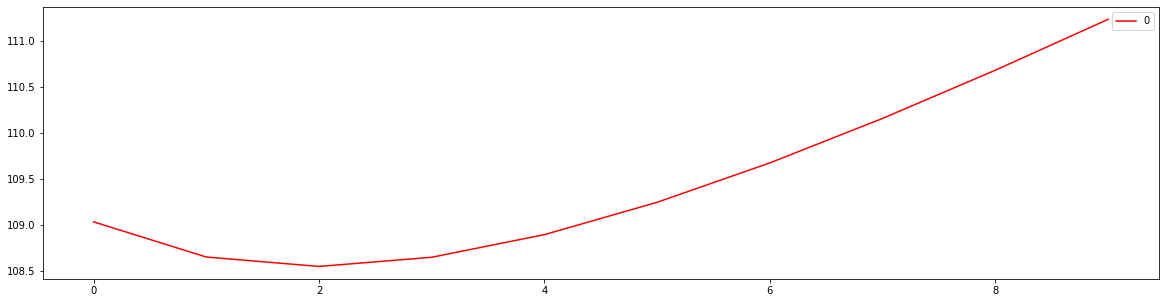

In [15]:
df_forecast.plot(figsize = (20,5), color = "red")

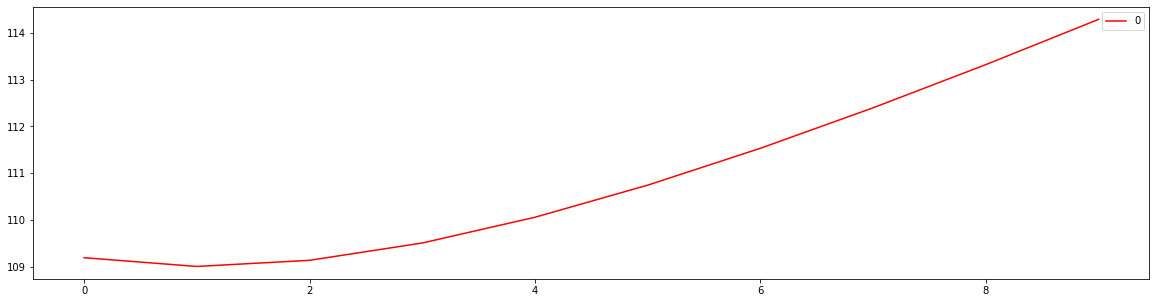

In [25]:
df_forecast_ret.plot(figsize = (20,5), color = "red")

In [16]:
dates=pd.date_range(start="1989-10-01",freq='QS',periods=10)
dates

DatetimeIndex(['1989-10-01', '1990-01-01', '1990-04-01', '1990-07-01',
               '1990-10-01', '1991-01-01', '1991-04-01', '1991-07-01',
               '1991-10-01', '1992-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [17]:
df_forecast

,0
0,109.033172
1,108.651989
2,108.549744
3,108.649255
4,108.894696
5,109.245689
6,109.673028
7,110.155589
8,110.678091
9,111.229482


In [18]:
df_forecast.index=dates
df_forecast.columns=['Predictions']
df_forecast.head()

,Predictions
1989-10-01,109.033172
1990-01-01,108.651989
1990-04-01,108.549744
1990-07-01,108.649255
1990-10-01,108.894696


In [26]:
df_forecast_ret.index = dates
df_forecast_ret.columns = ['Predictions']
df_forecast_ret.head()

,Predictions
1989-10-01,109.190639
1990-01-01,109.003596
1990-04-01,109.134611
1990-07-01,109.505162
1990-10-01,110.056114


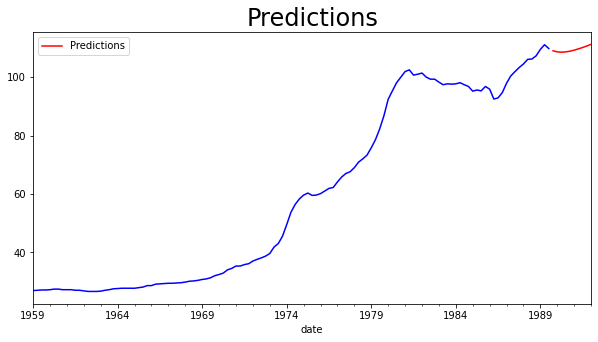

In [19]:
import matplotlib.pyplot as plt

df_forecast.plot(figsize = (10,5), color = "red")
dat.plot(color = "blue")
plt.title("Predictions", size = 24)
plt.show()

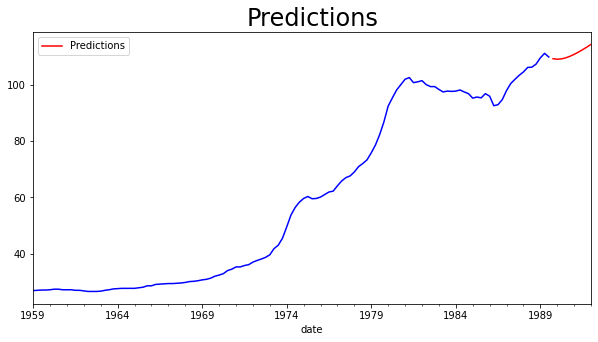

In [27]:
df_forecast_ret.plot(figsize = (10,5), color = "red")
dat.plot(color = "blue")
plt.title("Predictions", size = 24)
plt.show()